# Explore here


1. Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../data/raw/AB_NYC_2019.csv')

2. Finding dimensions and size of the dataframe

In [21]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* El dataframe tiene 48895 filas y 16 columnas.
* Hay variables con null values (name, host_name, last_review y reviews_per_month).
* Hay variables de type 'object', que probablemente sean categóricas.

In [7]:
round(df.describe(), 2)
 #Le ponemos el round porque corrimos el describe solo y al tener muchos dígitos es difícil de visualizar

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,4.889500e+04,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,19017143.24,6.762001e+07,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10983108.39,7.861097e+07,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2539.00,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9471945.00,7.822033e+06,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677284.00,3.079382e+07,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152178.50,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,2.743213e+08,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [6]:
#Describe for categorical variables
df.describe(include = classmethod) 
#df.describe(include = 'object') #same output

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


Things that stand out: 
* Hay precios con valor 0
* El precio máximo es 10000, bastante más alto que la media y la mediana
* El máximo de minimum_nights es 1250

In [6]:
#Transformamos datatypes
for col in ['neighbourhood', 'neighbourhood_group', 'room_type', 'host_id']:
    df[col] = df[col].astype('category')

df['last_review'] = pd.to_datetime(df['last_review'], format="%Y/%m/%d")

In [71]:
df.info() #Para chequear que la transformación quedó bien

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  category      
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  category      
 5   neighbourhood                   48895 non-null  category      
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

3. Eliminating duplicate and irrelevant data

In [47]:
len(df[df['price'] == 0]) 

11

In [9]:
df = df[df['price'] != 0]
#Como hay solo 11 observaciones de 'precio' con valor 0, las eliminamos:

In [27]:
df_duplicates = df['id'].duplicated().sum()
print(f'Parece haber {df_duplicates} valores duplicados en el dataset considerando la variable id.')

Parece haber 0 valores duplicados en el dataset considerando la variable id.


In [ ]:
#Pregunta: Debería dropear las columnas que no son tan relevantes? Tipo host_name, host_id?

4. Exploring relevant data columns

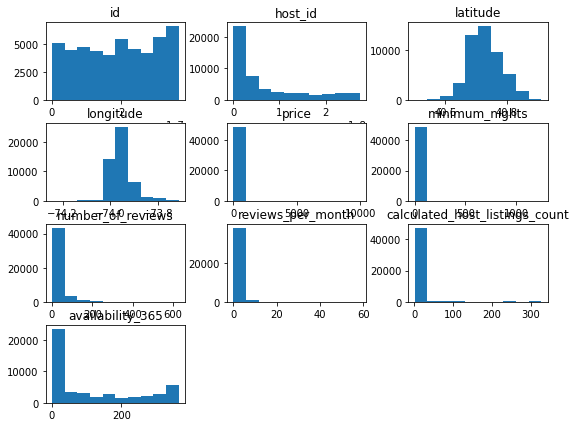

In [14]:
df.hist(bins=10,figsize=(9,7),grid=False)
plt.show()

* **Price:**

<AxesSubplot:ylabel='price'>

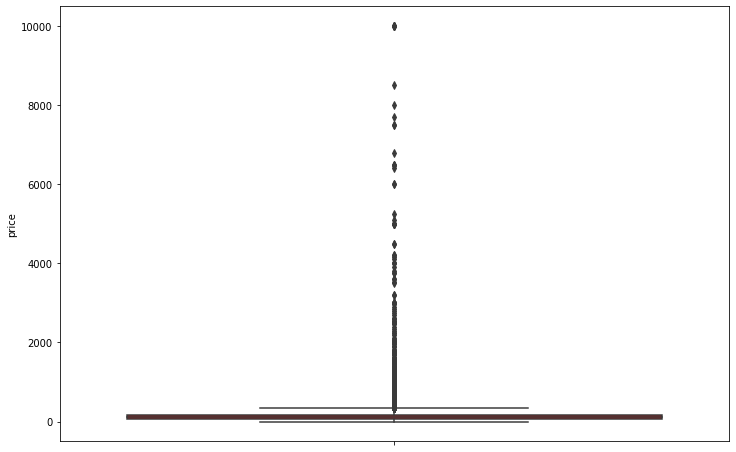

In [15]:
plt.figure(figsize = (12, 8))
sns.boxplot(y = df.price, showfliers = True, palette = 'gist_heat')

In [24]:
df['host_id'].value_counts()[:10] 
#Top de los 10 hosts con más publicaciones

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
1475015       52
Name: host_id, dtype: int64

In [19]:
df.groupby('host_id')['number_of_reviews'].sum().sort_values(ascending = False)[:10]
#Top de los 10 hosts con más reviews

host_id
37312959     2273
344035       2205
26432133     2017
35524316     1971
40176101     1818
4734398      1798
16677326     1355
6885157      1346
219517861    1281
23591164     1269
Name: number_of_reviews, dtype: int64

5. Finding null values

In [29]:
num_vars = df.columns[df.dtypes != 'object'] 'id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
cat_vars = df.columns[df.dtypes == 'category']'name', 'host_name', 'neighbourhouud_group', 'neighbourhood', 'room_type', 'last_review'

print("Numerical variables:", num_vars)
print("Categorical variables:", cat_vars)

Numerical variables: Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Categorical variables: Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


In [30]:
df[num_vars].isnull().sum()
#reviews_per_month tiene valores NA

id                                    0
host_id                               0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [31]:
df[cat_vars].isnull().sum()
#name, host_name y last_review tiene valores NA
#name y host_name no son relevantes para el análisis?
#Pregunta para Leonardo: Si yo quisiera ver qué tienen esas rows que tienen null en name cómo hago? Tipo como un filter(name == NA)  %>% View() de R

name                      16
host_name                 21
neighbourhood_group        0
neighbourhood              0
room_type                  0
last_review            10052
dtype: int64

In [38]:
df[df['reviews_per_month'].isnull()]['number_of_reviews'].describe()
#Los listings que tienen 0 reviews son los mismos que tienen null values en reviews_per_month

count    10052.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: number_of_reviews, dtype: float64

In [27]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
#Pasamos a 0 los null values de reviews_per_month

In [39]:
df[df['last_review'].isnull()]['number_of_reviews'].describe()
#Los listings que tienen 0 reviews son los mismos que tienen null values en last_review

count    10052.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: number_of_reviews, dtype: float64

In [40]:
df['last_review'] = df['last_review'].fillna(0)
#Pasamos a 0 los null values de last_review

6. Plotting features against each other

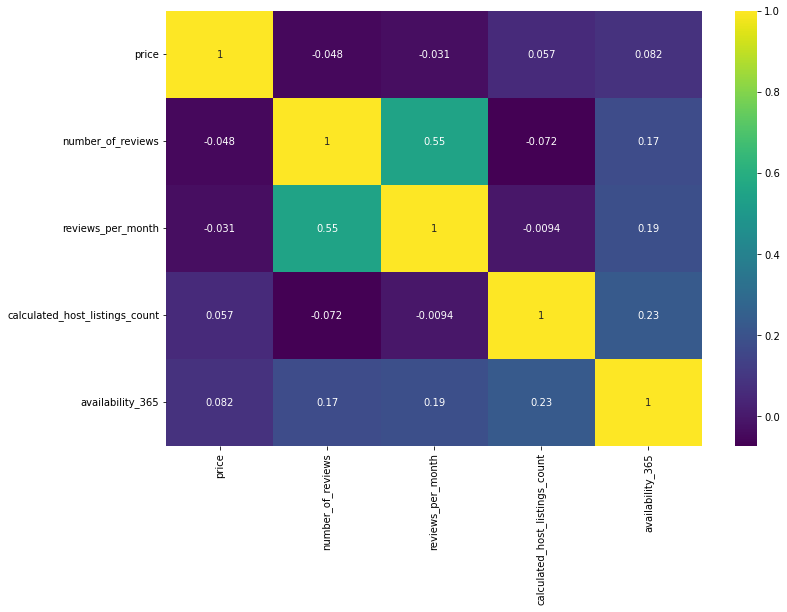

In [12]:
#Plotting a heatmap to find relations between features

plt.figure(figsize=(12, 8))
sns.heatmap(df[['price', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr(), annot=True, cmap='viridis')
plt.show()

#Reviews per month y number of reviews están correlacionadas (seems pretty obvious)
#Number of reviews y listings tienen relación negativa porque a menos listings tiene sentido que tengas menos reviews

7. Encoding categorical variables

In [22]:
#Pregunta:
#Se pueden encodear cosas con 0 1 2 3 o tienen que ser sí o sí dummies?
#Cómo se hace para encodear por ejemplo neighbourhood que tiene 221 categs?

In [18]:
df['room_type'].unique()
#Tiene 3 categorías: 'Entire home/apt', 'Private room', 'Shared room'

['Private room', 'Entire home/apt', 'Shared room']
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']

In [20]:
df['neighbourhood'].unique()
# Tiene 221 categorías: 'Allerton', 'Arden Heights', 'Arrochar', 'Arverne', ..., 'Woodhaven', 'Woodlawn', 'Woodrow', 'Woodside'

['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', ..., 'Bull's Head', 'New Dorp', 'Rossville', 'Breezy Point', 'Willowbrook']
Length: 221
Categories (221, object): ['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', ..., 'Woodhaven', 'Woodlawn', 'Woodrow', 'Woodside']

In [21]:
df['neighbourhood_group'].unique()
#Tiene 5 categorías: Bronx, Brooklyn, Manhattan, Queens, Staten Island

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']